In [1]:
#Extracting Tesla Stock Data Using yfinance

In [2]:
!pip install yfinance

  Using cached yfinance-0.2.43-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.6-py3-none-any.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached yfinance-0.2.43-py2.py3-none-any.whl (84 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)


In [4]:
import yfinance as yf
import pandas as pd

In [5]:
# Define the ticker symbol for Tesla
ticker_symbol = 'TSLA'

# Download Tesla stock data for a specific period (e.g., from 2020-01-01 to 2023-01-01)
tesla_data = yf.download(ticker_symbol, start='2020-01-01', end='2023-01-01')

# Display the first few rows of the data
print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  28.299999  28.713333  28.114000  28.684000  28.684000  142981500
2020-01-03  29.366667  30.266666  29.128000  29.534000  29.534000  266677500
2020-01-06  29.364668  30.104000  29.333332  30.102667  30.102667  151995000
2020-01-07  30.760000  31.441999  30.224001  31.270666  31.270666  268231500
2020-01-08  31.580000  33.232666  31.215334  32.809334  32.809334  467164500


In [6]:
!pip install requests beautifulsoup4


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [12]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Send a request to fetch the webpage content
response = requests.get(url)


In [18]:
# Parse the content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')


In [17]:
# Locate the table containing the revenue data
table = soup.find_all('table', {'class': 'historical_data_table table'})

# Extract the rows from the table
rows = table[0].find_all('tr')

# Initialize a list to hold the data
data = []

# Iterate over the rows and extract the data
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=['Date', 'Revenue'])
# Clean the data by removing unwanted characters
df['Revenue'] = df['Revenue'].str.replace(',', '').str.replace('$', '')
df['Revenue'] = df['Revenue'].astype(float)  # Convert revenue to float

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display the cleaned data
print(df)

# Optionally, save the data to a CSV file
df.to_csv('tesla_revenue_data.csv', index=False)


IndexError: list index out of range

In [20]:
import yfinance as yf
import pandas as pd
# Define the ticker symbol for GameStop
ticker_symbol = 'GME'

# Download GME stock data for a specific period
gme_data = yf.download(ticker_symbol, start='2020-01-01', end='2023-01-01')

# Display the first five rows of the data
print("Original GME Data:")
print(gme_data.head())
# Reset the index
gme_data_reset = gme_data.reset_index()

# Display the first five rows of the DataFrame after resetting the index
print("\nGME Data After Resetting Index:")
print(gme_data_reset.head())
# Save the data to a CSV file
gme_data_reset.to_csv('gme_stock_data.csv', index=False)
# Display the first five rows of the DataFrame after resetting the index
print(gme_data_reset.head())



[*********************100%***********************]  1 of 1 completed

Original GME Data:
              Open    High     Low   Close  Adj Close    Volume
Date                                                           
2020-01-02  1.5350  1.6175  1.5175  1.5775     1.5775  17814400
2020-01-03  1.5525  1.5625  1.4600  1.4700     1.4700  14175600
2020-01-06  1.4500  1.4775  1.4000  1.4625     1.4625  13579200
2020-01-07  1.4425  1.4575  1.3600  1.3800     1.3800  20912000
2020-01-08  1.3725  1.4625  1.3525  1.4300     1.4300  22517600

GME Data After Resetting Index:
        Date    Open    High     Low   Close  Adj Close    Volume
0 2020-01-02  1.5350  1.6175  1.5175  1.5775     1.5775  17814400
1 2020-01-03  1.5525  1.5625  1.4600  1.4700     1.4700  14175600
2 2020-01-06  1.4500  1.4775  1.4000  1.4625     1.4625  13579200
3 2020-01-07  1.4425  1.4575  1.3600  1.3800     1.3800  20912000
4 2020-01-08  1.3725  1.4625  1.3525  1.4300     1.4300  22517600
        Date    Open    High     Low   Close  Adj Close    Volume
0 2020-01-02  1.5350  1.6175  1.5175  

In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Send a request to fetch the webpage content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Successfully fetched the webpage")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")
# Parse the content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')
# Locate the table containing the revenue data
table = soup.find_all('table', {'class': 'historical_data_table table'})

# Extract the rows from the table
rows = table[0].find_all('tr')

# Initialize a list to hold the data
data = []

# Iterate over the rows and extract the data
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Convert the data into a DataFrame
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
# Clean the data by removing unwanted characters
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(float)  # Convert revenue to float

# Convert 'Date' to datetime format
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
# Display the last five rows of the DataFrame
print(gme_revenue.tail())


Failed to fetch the webpage. Status code: 403


IndexError: list index out of range

[*********************100%***********************]  1 of 1 completed


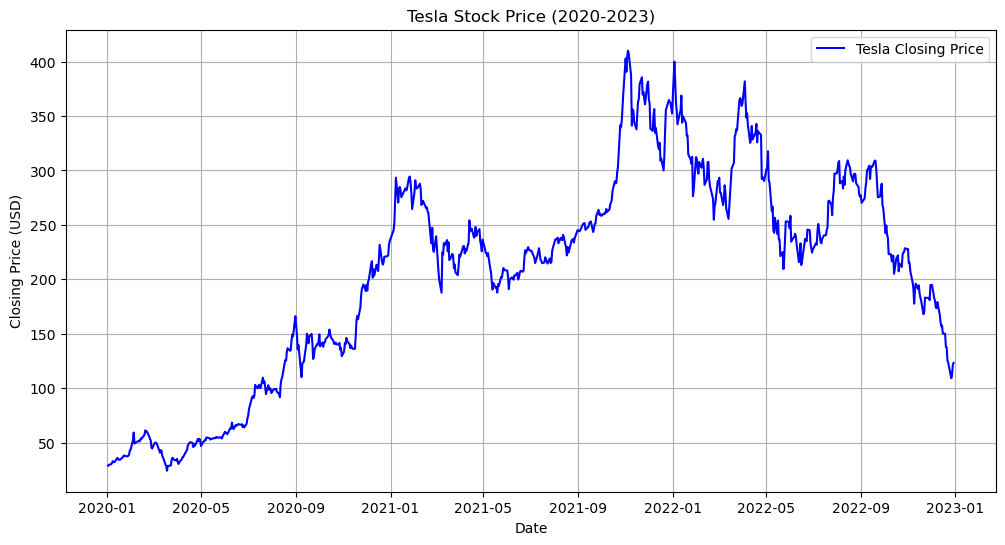

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt
# Define the ticker symbol for Tesla
ticker_symbol = 'TSLA'

# Download Tesla stock data for a specific period
tesla_data = yf.download(ticker_symbol, start='2020-01-01', end='2023-01-01')
def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Close'], label='Tesla Closing Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
# Plot the Tesla stock graph with a title
make_graph(tesla_data, 'Tesla Stock Price (2020-2023)')


[*********************100%***********************]  1 of 1 completed


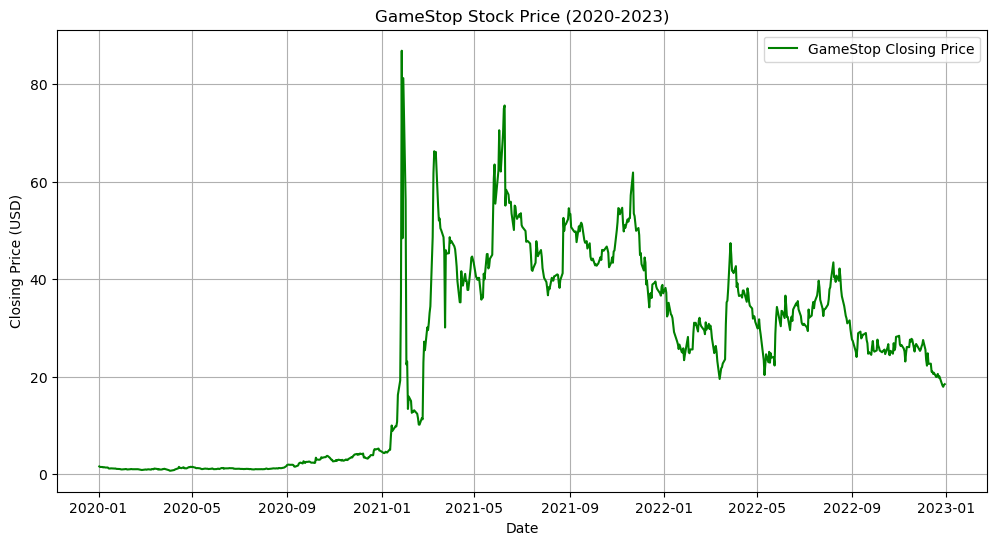

In [23]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 2: Download GameStop Stock Data
ticker_symbol = 'GME'
gme_data = yf.download(ticker_symbol, start='2020-01-01', end='2023-01-01')

# Step 3: Define the make_graph Function
def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Close'], label='GameStop Closing Price', color='green')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 4: Plot the GameStop Stock Graph
make_graph(gme_data, 'GameStop Stock Price (2020-2023)')
